In [32]:
import pandas as pd

toi = pd.read_csv('toi_example.csv', index_col=0)
tic_catalog = pd.read_csv('tic_catalog_example.csv', index_col=0)

df = toi.merge(tic_catalog, on='TIC ID')
df = df.fillna(df.mean())
df

,TIC ID,TOI,Epoch (BJD),Period (days),Duration (hours),Depth (mmag),Planet Radius (R_Earth),Planet Insolation (Earth Flux),Planet Equil Temp (K),Planet SNR,...,MH,rad,mass,rho,lum,d,ebv,numcont,contratio,priority
0,231663901,101.01,2.458326e+06,1.430401,1.638765,22.436284,13.145008,1193.379561,1499.044062,0.887868,...,-0.093421,0.890774,1.050000,1.485550,0.822462,375.310000,0.033360,90.000000,0.084449,0.000566
1,149603524,102.01,2.458326e+06,4.411943,3.776425,15.285609,15.397243,708.767112,1315.968940,474.380950,...,0.240000,1.214270,1.280000,0.714926,2.216167,175.631000,0.020257,971.000000,0.016392,0.007091
2,336732616,103.01,2.458327e+06,3.547854,3.494333,11.377523,14.581841,1212.004376,1504.858953,0.800299,...,-0.093421,1.276160,1.270000,0.611063,2.417336,411.211000,0.044639,112.000000,0.023094,0.000415
3,231670397,104.01,2.458328e+06,4.087445,5.590140,3.900662,12.652102,1672.217546,1630.958624,0.808662,...,-0.093421,2.218670,1.160000,0.106213,6.237656,316.678000,0.030207,81.000000,0.004832,0.000773
4,144065872,105.01,2.458327e+06,2.184659,2.869426,12.928190,12.514586,985.883704,1429.144596,0.886027,...,-0.093421,1.238240,1.030000,0.542529,1.518417,137.544000,0.006338,55.000000,0.003545,0.002210
5,38846515,106.01,2.458327e+06,2.849380,3.776111,8.121677,9.061380,1311.315373,1534.781437,278.009500,...,-0.093421,1.774570,1.440000,0.257683,5.830600,364.411000,0.023686,87.000000,0.068780,0.002905
6,92352620,107.01,2.458328e+06,3.950054,4.557506,14.207005,18.775574,1098.209548,1468.219722,0.860200,...,0.220000,1.710360,1.140000,0.227845,3.584022,211.211000,0.046266,118.000000,0.637895,0.000955
7,289793076,108.01,2.458328e+06,3.043839,2.660993,26.534793,13.999502,400.955287,1141.284018,0.820267,...,-0.093421,0.809868,0.950000,1.788470,0.519416,421.855000,0.048850,342.105634,0.139870,0.003094
8,29344935,109.01,2.458326e+06,2.766737,2.568721,17.172409,11.661768,433.482954,1163.758204,0.834164,...,-0.093421,0.984866,0.930000,0.973535,0.721826,513.011000,0.053547,342.105634,0.139870,0.003094
9,281459670,110.01,2.458328e+06,3.174305,2.723339,17.075061,13.668801,662.491006,1293.941810,100.352080,...,-0.100000,1.157060,1.030000,0.664921,1.318858,342.140000,0.011021,47.000000,2.934236,0.000552


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

df['TFOPWG Disposition'] = df[
    'TFOPWG Disposition'].replace({'KP': 1, 'CP': 1, 'FP': 0})

cp_df = df[df['TFOPWG Disposition'] == 1]

fp_df = df[df['TFOPWG Disposition'] == 0]

cp_train, cp_test = train_test_split(cp_df)
fp_train, fp_test = train_test_split(fp_df)

train = cp_train.append(fp_train)
train = train.sample(frac=1).reset_index(drop=True)

test = cp_test.append(fp_test)
test = test.sample(frac=1).reset_index(drop=True)

X_train = train.drop(columns=['TIC ID', 'TOI', 'TFOPWG Disposition'])
y_train = train['TFOPWG Disposition'].astype(int)

X_test = test.drop(columns=['TIC ID', 'TOI', 'TFOPWG Disposition'])
y_test = test['TFOPWG Disposition'].astype(int)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train on 248 samples, validate on 28 samples
Epoch 1/50
248/248 - 0s - loss: 0.7062 - acc: 0.5202 - val_loss: 0.6467 - val_acc: 0.5714
Epoch 2/50
248/248 - 0s - loss: 0.6559 - acc: 0.6048 - val_loss: 0.6554 - val_acc: 0.4286
Epoch 3/50
248/248 - 0s - loss: 0.6265 - acc: 0.6734 - val_loss: 0.6667 - val_acc: 0.4643
Epoch 4/50
248/248 - 0s - loss: 0.6010 - acc: 0.7218 - val_loss: 0.6853 - val_acc: 0.5000
Epoch 5/50
248/248 - 0s - loss: 0.5736 - acc: 0.7540 - val_loss: 0.6914 - val_acc: 0.5000
Epoch 6/50
248/248 - 0s - loss: 0.5523 - acc: 0.7702 - val_loss: 0.7228 - val_acc: 0.5357
Epoch 7/50
248/248 - 0s - loss: 0.5228 - acc: 0.8024 - val_loss: 0.7467 - val_acc: 0.5357
Epoch 8/50
248/248 - 0s - loss: 0.4926 - acc: 0.8387 - val_loss: 0.7570 - val_acc: 0.5357
Epoch 9/50
248/248 - 0s - loss: 0.4609 - acc: 0.8347 - val_loss: 0.7897 - val_acc: 0.5357
Epoch 10/50
248/248 - 0s - loss: 0.4311 - acc: 0.8548 - val_loss: 0.7876 - val_acc: 0.5357
Epoch 11/50
248/248 - 0s - loss: 0.4077 - acc: 0.8508 

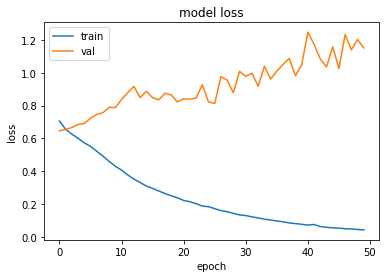

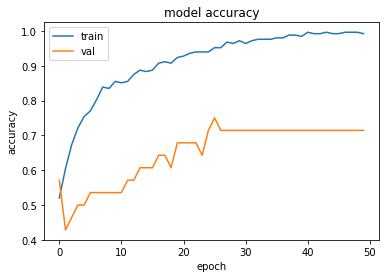

276/276 - 0s - loss: 0.1516 - acc: 0.9674
Train Accuracy Score: 0.9673913 

93/93 - 0s - loss: 0.5381 - acc: 0.8065
Test Accuracy Score: 0.8064516


In [40]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model():
    # Instantiate model:
    model = Sequential()
    # Add input layer:
    model.add(Dense(20, input_dim=33, activation='relu'))
    # Add hidden layer:
    model.add(Dense(20, activation='relu'))
    # Add output layer:
    model.add(Dense(1, activation='sigmoid'))
    # Compile model:
    model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])
    return model

batch_size = 5
epochs = 50

model = KerasClassifier(build_fn=create_model, verbose=2)

history = model.fit(X_train, y_train, batch_size=batch_size,
                    epochs=epochs, validation_split=.1, verbose=2)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print(f'Train Accuracy Score:', model.score(X_train, y_train), '\n')
print(f'Test Accuracy Score:', model.score(X_test, y_test))

93/93 - 0s
93/93 - 0s


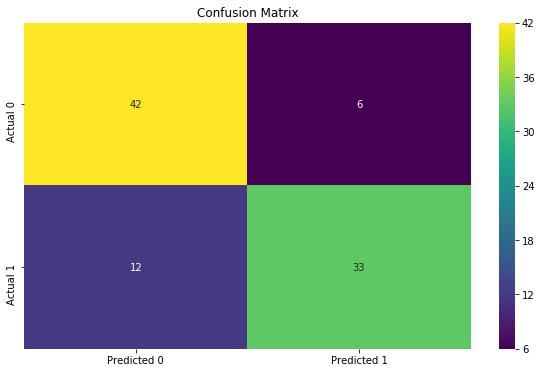

In [41]:
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}'  for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    fig = plt.figure(figsize=(10,6))
    plt.title('Confusion Matrix')
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

y_pred = model.predict(X_test)
y_predict_proba = model.predict_proba(X_test)

plot_confusion_matrix(y_test, y_pred);